In [1]:
### Loading Helpers
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random


In [2]:
### Loading Data
train_data = pd.read_csv('../input/digit-recognizer/train.csv', engine = 'python')
test_data = pd.read_csv('../input/digit-recognizer/test.csv', engine = 'python')
# train_data.head()

In [3]:
# print("train shape")
# train_data.shape
# print("test shape")
# test_data.describe()

In [4]:
### Train Data, Training Labels, Normalization
image_size = 28*28
X_train = train_data.drop('label', axis =1).copy()
Y_train = train_data['label'].copy()
X_train = X_train / 255.0
X_test = test_data / 255.0

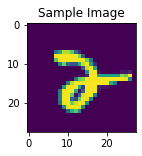

In [5]:
### Data: random Image Visualization 
fig, ax = plt.subplots(figsize = (2, 2))
trash = np.asarray(X_train.iloc[[34],:]).reshape(28, 28)
trash.shape
plt.imshow(trash)
plt.title("Sample Image")
plt.show()

In [6]:
### Reshapind data for the model
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [7]:
### One-Hot encoding and train-val split
num_class = len(Y_train.unique())
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2)
Y_train = keras.utils.to_categorical(Y_train, num_classes = num_class)
Y_val = keras.utils.to_categorical(Y_val, num_classes = num_class)

In [8]:
### Define model Function
def CNN():
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding ='valid', input_shape = (28, 28, 1), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding = 'valid'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding = 'same', activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding = 'valid'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding ='valid', activation = 'relu'))
#     model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding = 'valid'))
#     model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding = 'same', activation = 'relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.MaxPooling2D((2, 2), (2, 2), padding = 'valid'))
#     model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation = 'relu'))
#     model.add(layers.Dense(50, activation = 'relu'))
    model.add(layers.Dense(num_class, activation = 'softmax'))
    
    return model

In [9]:
### compile the model
model = CNN()
model.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0

In [10]:
X_train.shape

(33600, 28, 28, 1)

In [11]:
### Training the model
history = model.fit(X_train, Y_train, 
                  validation_data = (X_val, Y_val),
                   batch_size = 50, epochs = 10)

Epoch 1/10
672/672 [==============================] - 26s 39ms/step - loss: 0.4145 - accuracy: 0.8641 - val_loss: 0.0998 - val_accuracy: 0.9718
Epoch 2/10
672/672 [==============================] - 25s 38ms/step - loss: 0.1324 - accuracy: 0.9593 - val_loss: 0.0572 - val_accuracy: 0.9830
Epoch 3/10
672/672 [==============================] - 26s 39ms/step - loss: 0.0957 - accuracy: 0.9699 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 4/10
672/672 [==============================] - 26s 38ms/step - loss: 0.0844 - accuracy: 0.9735 - val_loss: 0.0428 - val_accuracy: 0.9868
Epoch 5/10
672/672 [==============================] - 26s 39ms/step - loss: 0.0754 - accuracy: 0.9763 - val_loss: 0.0400 - val_accuracy: 0.9883
Epoch 6/10
672/672 [==============================] - 26s 38ms/step - loss: 0.0691 - accuracy: 0.9782 - val_loss: 0.0449 - val_accuracy: 0.9873
Epoch 7/10
672/672 [==============================] - 25s 37ms/step - loss: 0.0630 - accuracy: 0.9801 - val_loss: 0.0366 - val_accuracy:

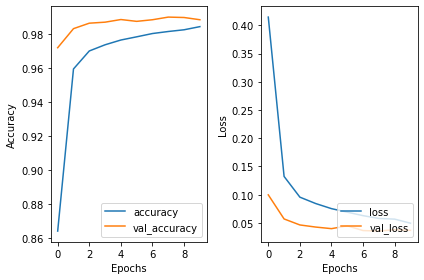

In [12]:
### Bias & Varience visualization 
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 'lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [13]:
### getting mean absolute error for validation data
from sklearn.metrics import mean_absolute_error
val_preds = model.predict(X_val)
val_mae = mean_absolute_error(val_preds, Y_val)
val_mae

0.0031103005

In [14]:
### Define predict function and display user defined number of images
def predict(model, X, imgs):
#     y_test = test_data['label'].copy()
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

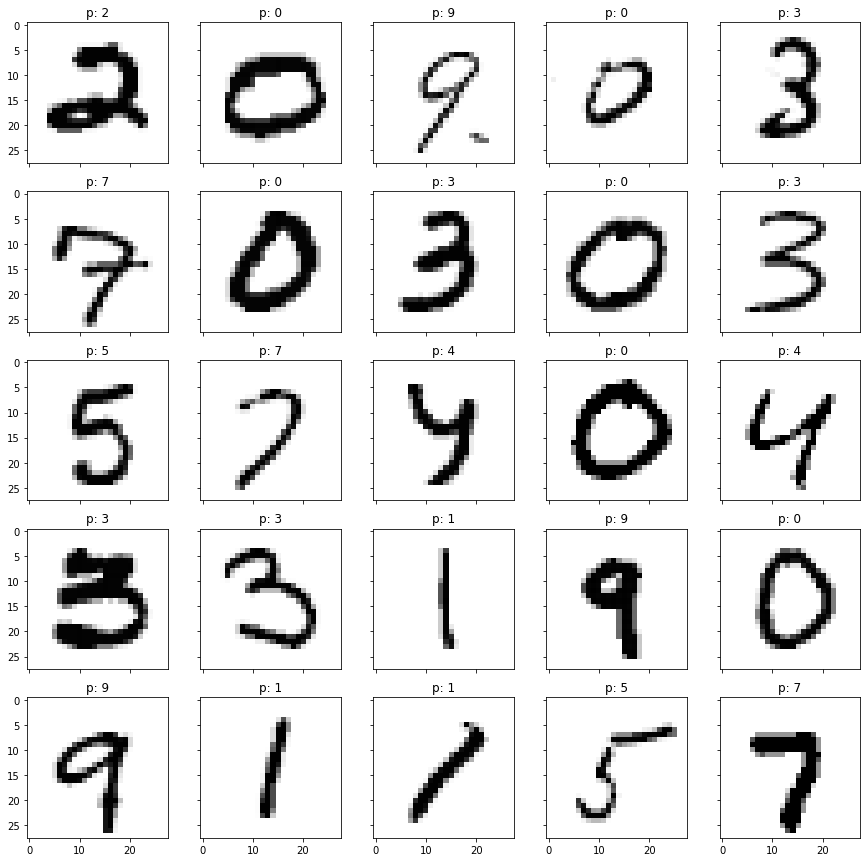

In [15]:
### Calling predict function and displaying first 25 images along with their predictions 
predict(model, X_test, 25)

In [16]:
### Making predictions for the entire Test dataset and creating submission file
test_preds = model.predict(X_test)
test_preds = np.argmax(test_preds, axis = 1)
name = "Prajesh Sanghvi"
file_name = name + "_MNIST_digit_recognizer.csv"
test_preds = pd.Series(test_preds, name = 'label')
submission = pd.concat([pd.Series(range(1,28001), name = "ImageID"), test_preds], axis = 1)
submission.to_csv(file_name, index = False)